In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Reading Data

In [2]:
df = pd.read_excel('PrivatizedDataforParticipants.xlsx')

In [3]:
new_header = df.iloc[1] #grab the first row for the header
df = df[2:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.head()

1,Generic Group,Generic Brand,Generic Product Category,Generic Product,Generic Group variable,Generic Variable,Generic Sub-Variable,Generic LookupKey,Units,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
2,Segment 1 - Sandesh Brand 2,Sandesh Brand 2,Mobile,Panther,Volume,Opening Base,Intentionally Blank,Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,000s,-2.36748,-2.15012,-2.00977,-1.86398,-1.68474,-1.53347,-1.36091,-1.22967,-1.0526,-0.895828,-0.773589,-0.68672,-0.607943,-0.542081,-0.45053,-0.340309,-0.239418,-0.141066,-0.0113998,0.0968797,0.159732,0.194961,0.25957,0.29011,0.350657,0.376531,0.397276,0.455199,0.50417,0.549063,0.591845,0.626687,0.718315,0.728544,0.776308,0.806253,0.849885,0.888031,0.936615,0.97261,1.01781,1.05427,x,x,x,x,x,x
3,Segment 1 - Sandesh Brand 2,Sandesh Brand 2,Mobile,Panther,Volume,Net Adds,Intentionally Blank,Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,000s,2.2632,1.09397,1.17643,1.6844,1.25973,1.58302,0.955581,1.65151,1.34325,0.818956,0.281974,0.159095,-0.0369724,0.353047,0.636516,0.49484,0.456308,0.931733,0.60703,-0.0826705,-0.502059,-0.0560035,-0.573249,-0.117678,-0.644087,-0.721974,-0.157503,-0.293422,-0.355332,-0.387403,-0.507933,0.354222,-0.881623,-0.311748,-0.582295,-0.37448,-0.457771,-0.299296,-0.490429,-0.350633,-0.48338,-0.464819,x,x,x,x,x,x
4,Segment 1 - Sandesh Brand 2,Sandesh Brand 2,Mobile,Panther,Volume,Closing Base,Intentionally Blank,Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,000s,-2.34673,-2.19826,-2.04405,-1.85444,-1.69442,-1.51188,-1.37305,-1.18573,-1.01989,-0.890583,-0.798689,-0.715356,-0.645684,-0.548838,-0.432241,-0.325515,-0.221474,-0.0843071,0.0302356,0.0967234,0.13399,0.202336,0.234643,0.298691,0.326063,0.348007,0.409281,0.461084,0.508575,0.55383,0.590688,0.687616,0.698437,0.748964,0.78064,0.826796,0.867149,0.918543,0.95662,1.00444,1.04301,1.08287,x,x,x,x,x,x
5,Segment 1 - Sandesh Brand 2,Sandesh Brand 2,Mobile,Leopard,Volume,Opening Base,Intentionally Blank,Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,000s,-1.95353,-1.93867,-1.92615,-1.84264,-1.6596,-1.48458,-1.36954,-1.29191,-1.10492,-0.879174,-0.74894,-0.653348,-0.54639,-0.459175,-0.394813,-0.320322,-0.261168,-0.211915,-0.156187,-0.121878,-0.0619381,0.0117976,0.073956,0.139677,0.199525,0.252763,0.296657,0.320295,0.339887,0.358348,0.395072,0.414408,0.547359,0.586423,0.643766,0.677381,0.77489,0.829969,0.895388,0.952611,1.05806,1.14703,x,x,x,x,x,x
6,Segment 1 - Sandesh Brand 2,Sandesh Brand 2,Mobile,Leopard,Volume,Net Adds,Intentionally Blank,Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,000s,-1.28514,-1.33479,0.181068,2.3072,2.13569,0.854531,0.05566,2.39134,3.21923,1.17917,0.439299,0.682055,0.260375,-0.227717,-0.0113961,-0.33894,-0.550424,-0.412121,-0.869586,-0.322176,-0.0275154,-0.274785,-0.198702,-0.32411,-0.465315,-0.664871,-1.09751,-1.18391,-1.20809,-0.818004,-1.18939,1.2372,-0.768034,-0.377626,-0.884416,0.480241,-0.425984,-0.20515,-0.380205,0.649816,0.297771,-0.0903805,x,x,x,x,x,x


In [4]:
df2 = df.drop(['Generic Group','Generic Brand','Generic Product Category','Generic Sub-Variable','Units'],axis=1)
df2 = df2.rename(columns={'Generic LookupKey': 'Generic_LookupKey', 'Generic Variable': 'Generic_Variable'})
df2.reset_index(inplace = True, drop = True)
df2

1,Generic Product,Generic Group variable,Generic_Variable,Generic_LookupKey,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
0,Panther,Volume,Opening Base,Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,-2.36748,-2.15012,-2.00977,-1.86398,-1.68474,-1.53347,-1.36091,-1.22967,-1.0526,-0.895828,-0.773589,-0.68672,-0.607943,-0.542081,-0.45053,-0.340309,-0.239418,-0.141066,-0.0113998,0.0968797,0.159732,0.194961,0.25957,0.29011,0.350657,0.376531,0.397276,0.455199,0.50417,0.549063,0.591845,0.626687,0.718315,0.728544,0.776308,0.806253,0.849885,0.888031,0.936615,0.97261,1.01781,1.05427,x,x,x,x,x,x
1,Panther,Volume,Net Adds,Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,2.2632,1.09397,1.17643,1.6844,1.25973,1.58302,0.955581,1.65151,1.34325,0.818956,0.281974,0.159095,-0.0369724,0.353047,0.636516,0.49484,0.456308,0.931733,0.60703,-0.0826705,-0.502059,-0.0560035,-0.573249,-0.117678,-0.644087,-0.721974,-0.157503,-0.293422,-0.355332,-0.387403,-0.507933,0.354222,-0.881623,-0.311748,-0.582295,-0.37448,-0.457771,-0.299296,-0.490429,-0.350633,-0.48338,-0.464819,x,x,x,x,x,x
2,Panther,Volume,Closing Base,Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,-2.34673,-2.19826,-2.04405,-1.85444,-1.69442,-1.51188,-1.37305,-1.18573,-1.01989,-0.890583,-0.798689,-0.715356,-0.645684,-0.548838,-0.432241,-0.325515,-0.221474,-0.0843071,0.0302356,0.0967234,0.13399,0.202336,0.234643,0.298691,0.326063,0.348007,0.409281,0.461084,0.508575,0.55383,0.590688,0.687616,0.698437,0.748964,0.78064,0.826796,0.867149,0.918543,0.95662,1.00444,1.04301,1.08287,x,x,x,x,x,x
3,Leopard,Volume,Opening Base,Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,-1.95353,-1.93867,-1.92615,-1.84264,-1.6596,-1.48458,-1.36954,-1.29191,-1.10492,-0.879174,-0.74894,-0.653348,-0.54639,-0.459175,-0.394813,-0.320322,-0.261168,-0.211915,-0.156187,-0.121878,-0.0619381,0.0117976,0.073956,0.139677,0.199525,0.252763,0.296657,0.320295,0.339887,0.358348,0.395072,0.414408,0.547359,0.586423,0.643766,0.677381,0.77489,0.829969,0.895388,0.952611,1.05806,1.14703,x,x,x,x,x,x
4,Leopard,Volume,Net Adds,Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,-1.28514,-1.33479,0.181068,2.3072,2.13569,0.854531,0.05566,2.39134,3.21923,1.17917,0.439299,0.682055,0.260375,-0.227717,-0.0113961,-0.33894,-0.550424,-0.412121,-0.869586,-0.322176,-0.0275154,-0.274785,-0.198702,-0.32411,-0.465315,-0.664871,-1.09751,-1.18391,-1.20809,-0.818004,-1.18939,1.2372,-0.768034,-0.377626,-0.884416,0.480241,-0.425984,-0.20515,-0.380205,0.649816,0.297771,-0.0903805,x,x,x,x,x,x
5,Leopard,Volume,Closing Base,Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,-2.04374,-2.03103,-1.94628,-1.7605,-1.58287,-1.46612,-1.38733,-1.19755,-0.968435,-0.836259,-0.73924,-0.630686,-0.54217,-0.476847,-0.401245,-0.341208,-0.29122,-0.234661,-0.199839,-0.139006,-0.0641698,-0.00108396,0.0656173,0.126359,0.180391,0.22494,0.248931,0.268815,0.287551,0.324824,0.344448,0.479382,0.519029,0.577228,0.611345,0.710309,0.76621,0.832605,0.890681,0.997703,1.088,1.15985,x,x,x,x,x,x
6,Lion,Volume,Opening Base,Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


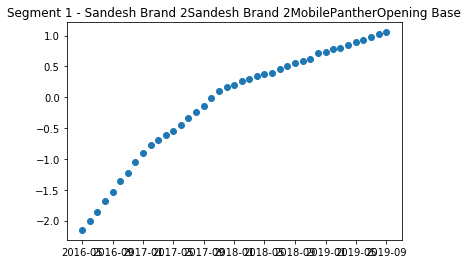

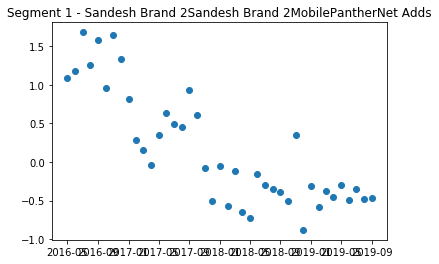

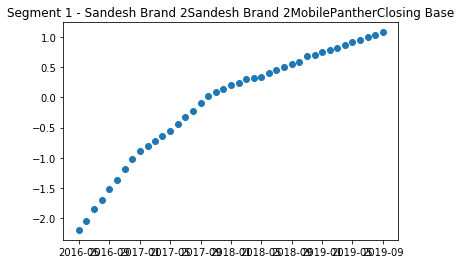

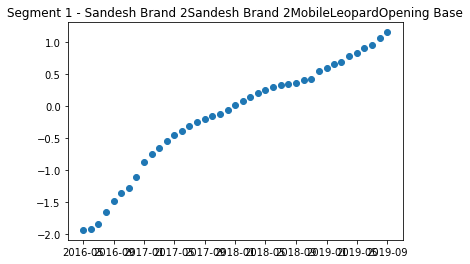

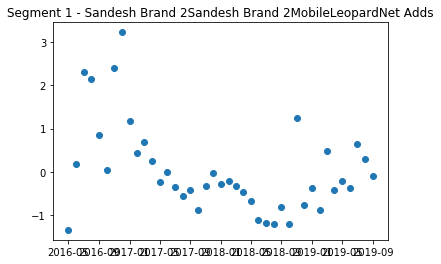

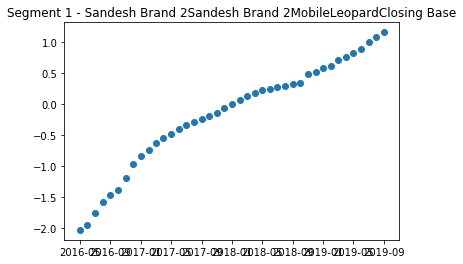

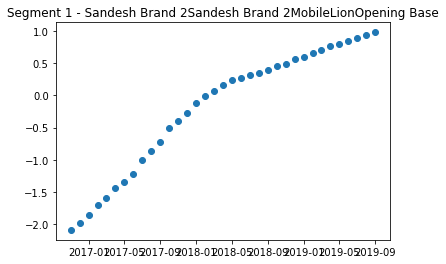

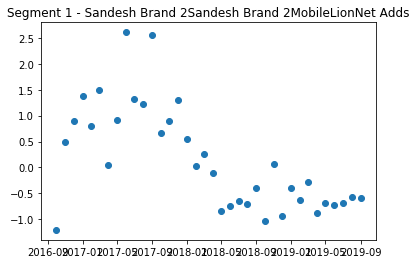

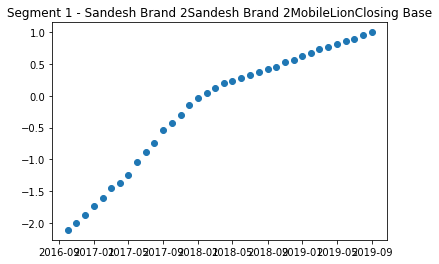

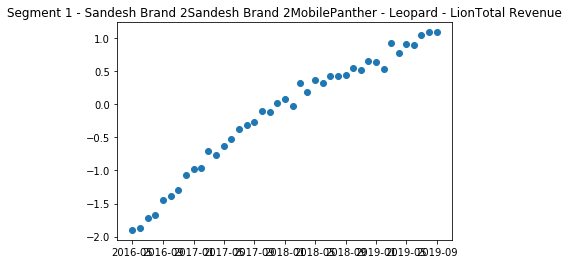

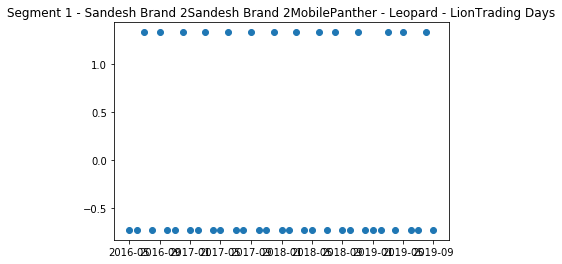

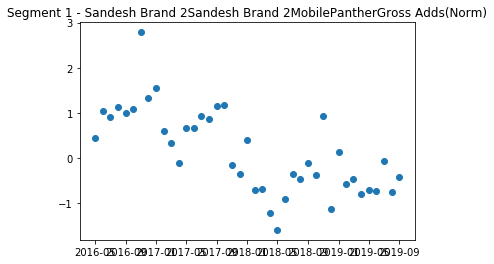

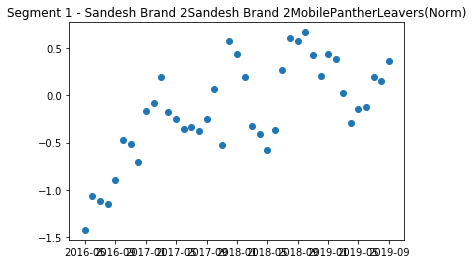

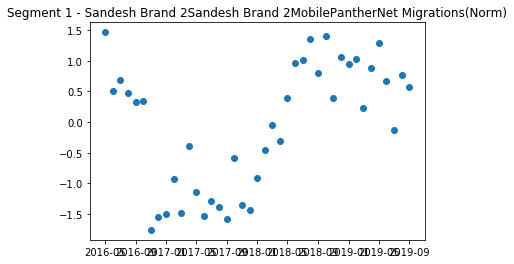

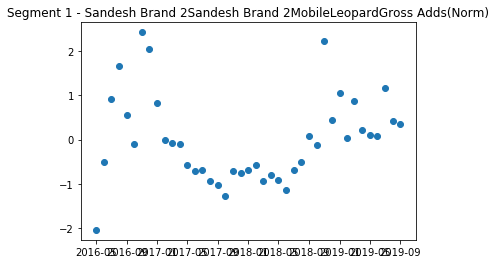

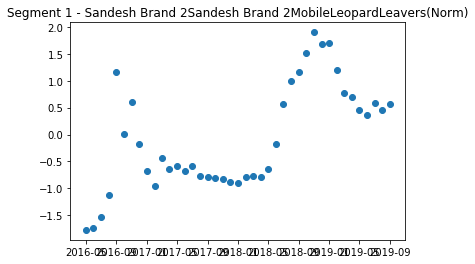

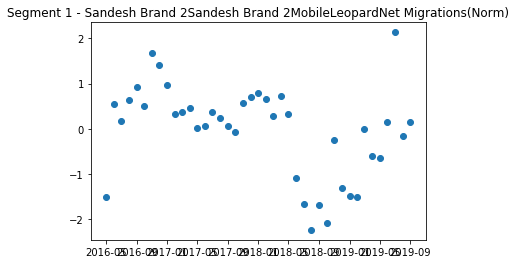

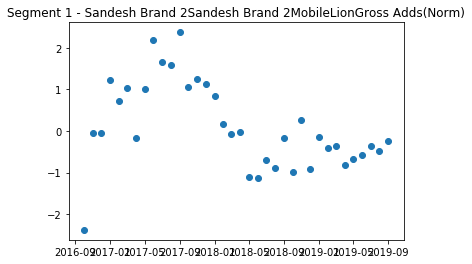

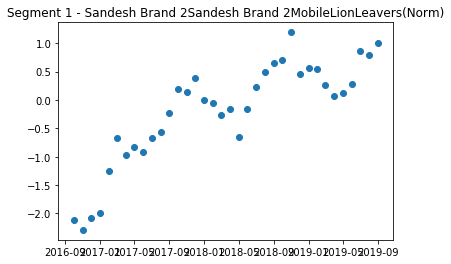

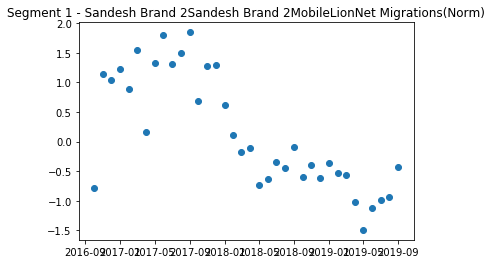

In [5]:
df_titles = df2['Generic_LookupKey'].tolist()
for i in range(0,df2.shape[0]):
    df_samp = df2.iloc[i:i+1, 5:46] 
    transform = df_samp.melt(var_name="Date", value_name="Value")
    plt.plot_date(transform.Date,transform.Value)
    plt.title(df_titles[i])
    plt.show()

In [6]:
df_leavers = df2[df2.Generic_Variable == 'Gross Adds(Norm)']
df_leavers.reset_index(inplace = True)
df_leavers

1,index,Generic Product,Generic Group variable,Generic_Variable,Generic_LookupKey,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
0,11,Panther,Volume,Gross Adds(Norm),Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,1.15148,0.445945,1.04327,0.905359,1.1386,1.00235,1.07885,2.7873,1.33449,1.55706,0.602576,0.330654,-0.111355,0.672964,0.669445,0.925122,0.870784,1.14823,1.17244,-0.158924,-0.342589,0.390834,-0.706168,-0.685245,-1.21377,-1.59257,-0.902751,-0.353844,-0.463254,-0.111548,-0.36738,0.92547,-1.12269,0.127074,-0.565586,-0.470679,-0.786805,-0.704428,-0.734401,-0.0552766,-0.743257,-0.411275,x,x,x,x,x,x
1,14,Leopard,Volume,Gross Adds(Norm),Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,-2.12183,-2.04906,-0.505295,0.917019,1.65878,0.554164,-0.105241,2.43474,2.06432,0.82376,-0.00571655,-0.0689551,-0.0944725,-0.574146,-0.703038,-0.686396,-0.931127,-1.03274,-1.26918,-0.706627,-0.752898,-0.683133,-0.568272,-0.942679,-0.805499,-0.927265,-1.14812,-0.696512,-0.512996,0.0895655,-0.113072,2.24366,0.44981,1.04728,0.0327879,0.866637,0.214868,0.106207,0.0843446,1.17944,0.414765,0.358444,x,x,x,x,x,x
2,17,Lion,Volume,Gross Adds(Norm),Segment 1 - Sandesh Brand 2Sandesh Brand 2Mobi...,NaN,NaN,NaN,NaN,NaN,NaN,-2.37857,-0.0394596,-0.0558447,1.21942,0.73251,1.03186,-0.174769,1.01032,2.1885,1.65236,1.58204,2.37736,1.06616,1.26058,1.13997,0.845455,0.167965,-0.0811077,-0.0296976,-1.11699,-1.13791,-0.701574,-0.893269,-0.175655,-0.992898,0.26139,-0.901305,-0.141382,-0.397546,-0.354349,-0.823599,-0.664937,-0.565071,-0.348499,-0.481515,-0.251293,x,x,x,x,x,x


In [7]:
df_samp = df_leavers.iloc[0:1, 5:46] 
df_samp = df_samp.melt(var_name="Date", value_name="Value")

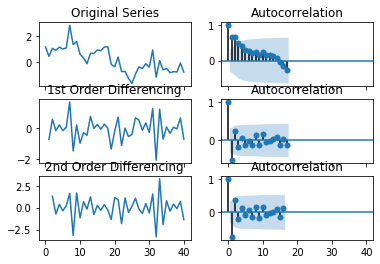

In [8]:
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_samp.Value); axes[0, 0].set_title('Original Series')
plot_acf(df_samp.Value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_samp.Value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_samp.Value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_samp.Value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_samp.Value.diff().diff().dropna(), ax=axes[2, 1])
plt.savefig('fig.png')
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_samp.Value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# d = 0

ADF Statistic: -1.465217
p-value: 0.550643


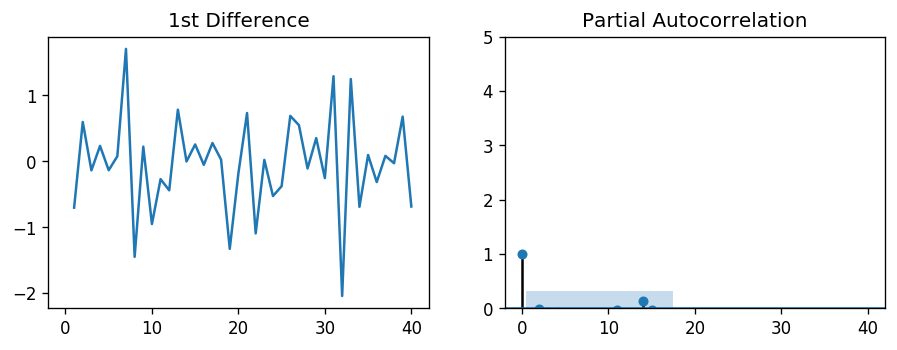

In [10]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_samp.Value.diff()); axes[0].set_title('1st Difference')
axes[1].set(ylim=(0,5))
plot_pacf(df_samp.Value.diff().dropna(), ax=axes[1])

plt.show()
# p =1

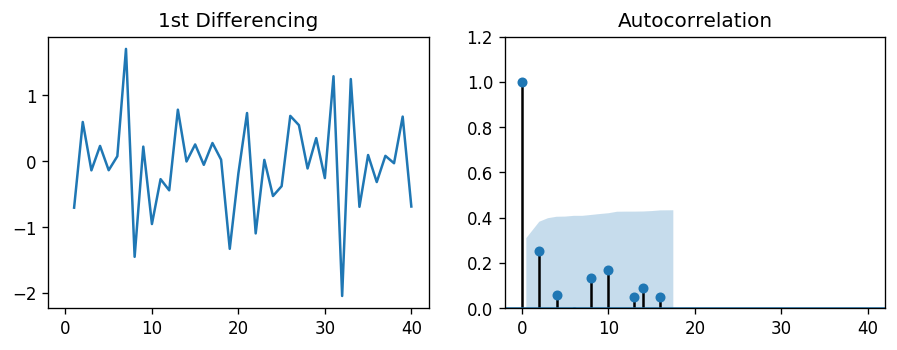

In [11]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_samp.Value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_samp.Value.diff().dropna(), ax=axes[1])

plt.show()
# d= 2

In [12]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(np.asarray(df_samp.Value), order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -38.422
Method:                       css-mle   S.D. of innovations              0.630
Date:                Tue, 26 May 2020   AIC                             84.844
Time:                        13:07:57   BIC                             91.600
Sample:                             1   HQIC                            87.287
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0361      0.066     -0.545      0.586      -0.166       0.094
ar.L1.D.y     -0.5214      0.280     -1.864      0.062      -1.070       0.027
ma.L1.D.y      0.0032      0.333      0.010      0.9

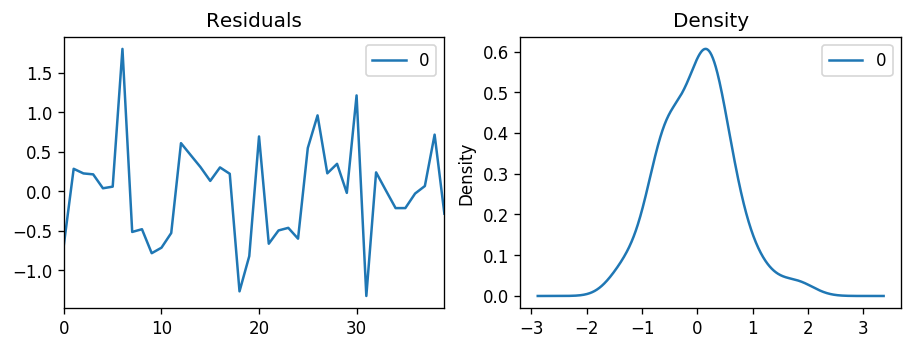

In [13]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

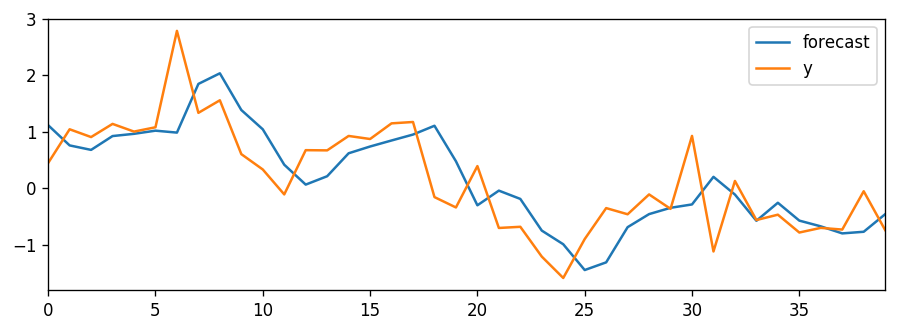

In [14]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [15]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_samp.Value[:30]
test = df_samp.Value[30:]

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -38.422
Method:                       css-mle   S.D. of innovations              0.630
Date:                Tue, 26 May 2020   AIC                             84.844
Time:                        13:07:57   BIC                             91.600
Sample:                             1   HQIC                            87.287
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0361      0.066     -0.545      0.586      -0.166       0.094
ar.L1.D.y     -0.5214      0.280     -1.864      0.062      -1.070       0.027
ma.L1.D.y      0.0032      0.333      0.010      0.9

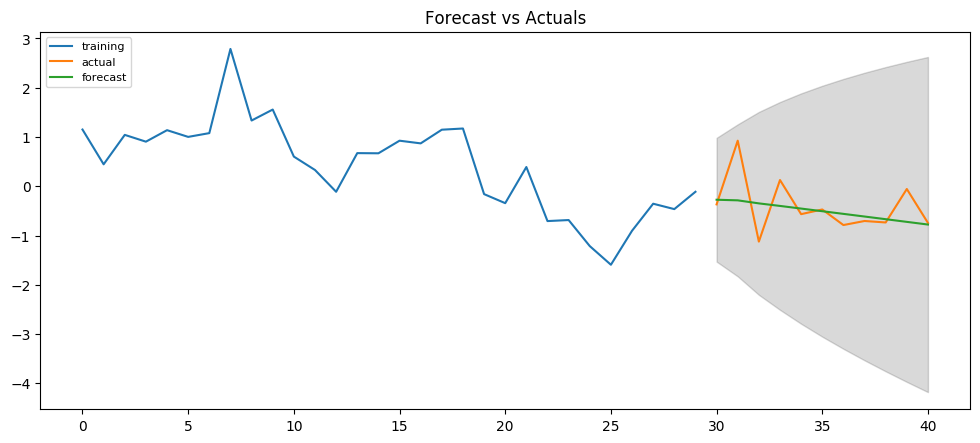

In [16]:
# Build Model 
model = ARIMA(np.asarray(train), order=(3, 2, 1)) 
#model = ARIMA(np.asarray(train), order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(11, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
print(model_fit.summary())
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [17]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,  'minmax':minmax})

print(forecast_accuracy(fc, test.values))

{'mape': 1.7531171958982092, 'me': -0.10041889357950612, 'mae': 0.3490194797786766, 'mpe': 0.46210293807813424, 'rmse': 0.5114038175512959, 'acf1': -0.5984458054016829, 'minmax': -0.9292441695971903}


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


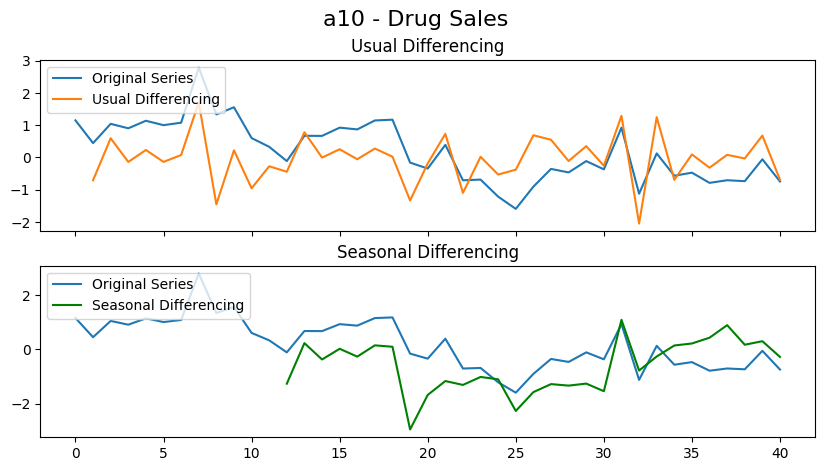

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df_samp.Value, label='Original Series')
axes[0].plot(df_samp.Value.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(df_samp.Value, label='Original Series')
axes[1].plot(df_samp.Value.diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [19]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df_samp.Value, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,1,1,12) [intercept=True]; AIC=74.798, BIC=81.277, Time=0.419 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=109.025, BIC=111.616, Time=0.009 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=77.546, BIC=82.729, Time=0.107 seconds
Near non-invertible roots for order (1, 2, 0)(1, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.990)
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=77.408, BIC=82.591, Time=0.214 seconds
Near non-invertible roots for order (0, 2, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=107.080, BIC=108.376, Time=0.011 seconds
Fit ARIMA(1,2,1)x(0,1,0,12) [intercept=True]; AIC=84.079, BIC=89.263, Time=0.107 seconds
Near non-invertible roots for order (1, 2, 1)(0, 1, 0, 12); setting score to inf (at least one inver

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   41
Model:             SARIMAX(1, 2, 1)x(1, 1, [], 12)   Log Likelihood                 -28.783
Date:                             Tue, 26 May 2020   AIC                             67.566
Time:                                     13:08:08   BIC                             74.046
Sample:                                          0   HQIC                            69.493
                                              - 41                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0201      0.030     -0.664      0.507      -0.080       0.039
ar.L1         -0.2933      0.231     -1.270      0.204      -0.746       0.159
ma.L1         -0.9968     14.172     -0.070      0.944     -28.774      26.781
ar.S.L12      -0.8669      0.108     -8.059      0.000      -1.078      -0.656
sigma2         0.2238      3.210      0.070      0.944      -6.067       6.515
===================================================================================
Ljung-Box (Q):                       19.83   Jarque-Bera (JB):                 5.77
Prob(Q):                              0.80   Prob(JB):                         0.06
Heteroskedasticity (H):               0.75   Skew:                            -0.90
Prob(H) (two-sided):                  0.68   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
df_samp2 = df_samp
df_samp2 = df_samp2.set_index('Date')
df_samp2


,Value
Date,
2016-04-01,1.15148
2016-05-01,0.445945
2016-06-01,1.04327
2016-07-01,0.905359
2016-08-01,1.1386
2016-09-01,1.00235
2016-10-01,1.07885
2016-11-01,2.7873
2016-12-01,1.33449


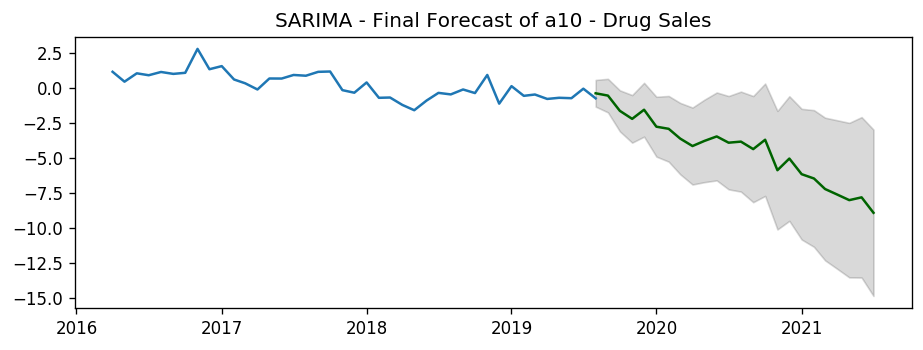

In [23]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_samp2.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df_samp2)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(df_samp2['Value'][-36:],extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
df_samp2['month'] = df_samp2.index.month
df10 = pd.merge(df_samp2, seasonal_index, how='left', on='month')
df10.columns = ['Value', 'month', 'seasonal_index']
df10.index = df_samp.index  # reassign the index

In [25]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df10[['Value']], exogenous=df10[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=70.825, BIC=78.818, Time=0.413 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=85.576, BIC=89.573, Time=0.014 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=64.008, BIC=70.669, Time=0.119 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=68.874, BIC=75.535, Time=0.232 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=83.611, BIC=86.275, Time=0.024 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=81.716, BIC=87.045, Time=0.030 seconds
Fit ARIMA(1,1,0)x(2,1,0,12) [intercept=True]; AIC=66.007, BIC=74.000, Time=0.296 seconds
Fit ARIMA(1,1,0)x(1,1,1,12) [intercept=True]; AIC=66.007, BIC=74.000, Time=0.253 seconds
Fit ARIMA(1,1,0)x(0,1,1,12) [intercept=True]; AIC=71.246, BIC=77.907, Time=0.184 seco

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                 -24.865
Date:                             Tue, 26 May 2020   AIC                             61.731
Time:                                     13:09:53   BIC                             69.724
Sample:                                          0   HQIC                            64.175
                                              - 41                                         
Covariance Type:                               opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0325      0.028      1.173      0.241      -0.022       0.087
seasonal_index -4.063e-05   6.49e+04  -6.26e-10      1.000   -1.27e+05    1.27e+05
ar.L1              0.3683      0.517      0.712      0.476      -0.646       1.382
ma.L1             -0.9981     29.662     -0.034      0.973     -59.135      57.139
ar.S.L12          -0.8810      0.100     -8.771      0.000      -1.078      -0.684
sigma2             0.1614      4.759      0.034      0.973      -9.166       9.489
===================================================================================
Ljung-Box (Q):                       20.30   Jarque-Bera (JB):                 9.87
Prob(Q):                              0.82   Prob(JB):                         0.01
Heteroskedasticity (H):               0.82   Skew:                            -1.11
Prob(H) (two-sided):                  0.78   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
train = df_samp.Value[:32].astype(float)
test = df_samp.Value[32:].astype(float)
print(test)

32   -1.122692
33    0.127074
34   -0.565586
35   -0.470679
36   -0.786805
37   -0.704428
38   -0.734401
39   -0.055277
40   -0.743257
Name: Value, dtype: float64


In [30]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(np.asarray(train), trend='n', order=(1,1,1), seasonal_order=(1,0,0,12))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% conf

# Make as pandas seriesfc_series = pd.Series(fc, index=test.index)
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
print(model_fit.summary())
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   32
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                 -29.101
Date:                             Tue, 26 May 2020   AIC                             66.202
Time:                                     13:11:26   BIC                             71.938
Sample:                                          0   HQIC                            68.072
                                              - 32                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6701      0.412     -1.627      0.104      -1.477       0.137
ma.L1          0.3884      

IndexError: invalid index to scalar variable.

In [31]:
print(forecast_accuracy(fc_series, test.values))

{'mape': 3.7540401395335437, 'me': 1.3029398963970371, 'mae': 1.3029398963970371, 'mpe': -2.680151618881509, 'rmse': 1.352634841336778, 'acf1': -0.44832296898598645, 'minmax': 1.757982344254787}


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
